# IP Experiment No. 05
Krisha
C035

> Indented block


Image Enhancement using spatial domain filters (neighborhood processing)<br>



Aim:<br>

Apply a suitable spatial domain filtering technique to enhance the following three images.<br>
i. Blur Image<br>
ii.	Sharpen Image.<br>
iii.Remove salt and pepper noise.


Neighborhood processing in spatial domain: <br>

Here, to modify one pixel, we consider values of the immediate neighboring pixels also. For this purpose, 3X3, 5X5 or 7X7 neighborhood mask can be considered. Example of 3X3 mask is shown below. <br>

f(x-1,y-1) f(x-1,y) f(x-1,y+1)<br>
f(x,y-1) f(x,y) f(x,y+1) <br>
f(x+1,y-1) f(x+1,y) f(x+1,y+1) <br>

# Low Pass filtering for blurring

It is also known as smoothing filter. It removes the high frequency content from the image. It is also used to blurr an image. Low pass averaging filter mask is as shown.<br>

1/9 1/9 1/9<br>
1/9 1/9 1/9<br>
1/9 1/9 1/9<br>

the pixel which is to be filtered is processed with mask as shown in example below<br>
The pixel with value 106 after applying mask is converted to 115.<br>
The mask is shifted pixel by pixel and the process is repeated till all pixels are covered.


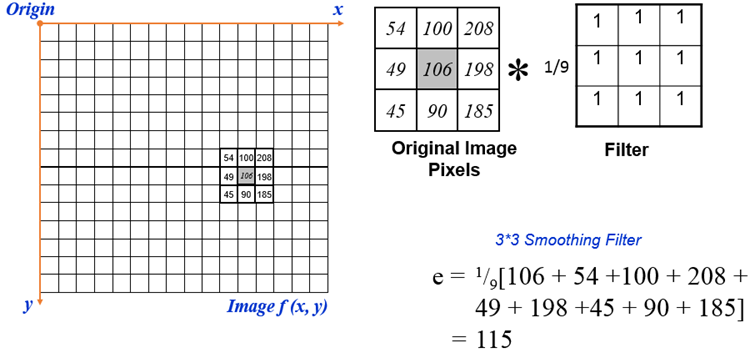

In [ ]:
#import cv2, numpy, matplotlib
import cv2
from skimage import io
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt


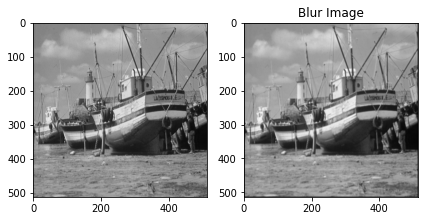

In [ ]:
from scipy import signal
img = cv2.imread('Boat.png',0)
I = img.copy()
mask =np.ones([3,3],dtype=int)
mask = mask/9
FI = signal.convolve2d(img,mask)

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(FI,cmap='gray')
plt.title('Blur Image')
plt.tight_layout()

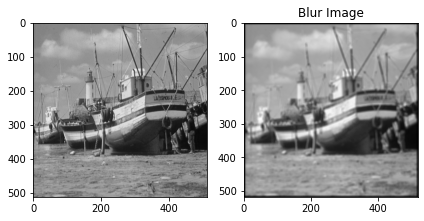

In [ ]:
#Create averaging filter(7,7) mask

from scipy import signal
img = cv2.imread('Boat.png',0)
I = img.copy()
mask =np.ones([7,7],dtype=int)
mask = mask/49
FI = signal.convolve2d(img,mask)

#plot the original and filtered image

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(FI,cmap='gray')
plt.title('Blur Image')
plt.tight_layout()



# High Pass Filtering in Spatial Domain- Laplacian Mask

It eliminates low frequency regions while retaining or enhancing the high frequency components (sharp edges). High pass filtering is done using Laplacian filtering mask as shown below : <br>           
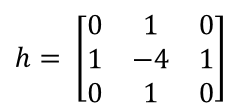


The high pass filtering operation for a pixel is as illustrated below:
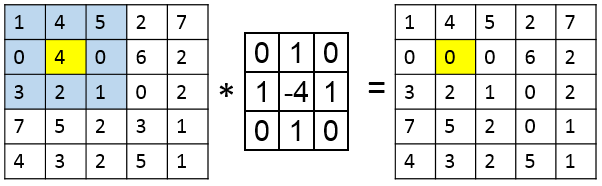

The high pass filtering process (convolution) of each pixel with the mask is carried out till all pixels are covered as shown below:


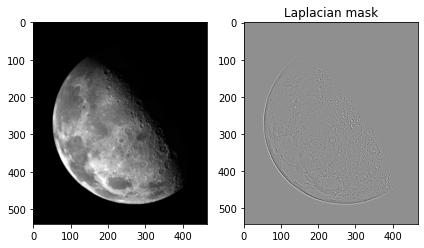

In [ ]:
# Read image 'Blurr_moon.tif'


img = cv2.imread('Blurr_moon.tif',0)
I = img.copy()
mask =np.array([[0,1,0],[1,-4,1],[0,1,0]])
mask = mask/49
FI = signal.convolve2d(img,mask)

# create Laplacian mask


# plot the original and resultant image

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(FI,cmap='gray')
plt.title('Laplacian mask')
plt.tight_layout()




The above result of appling HPF to the image provide sharp edges.<br>
However we want the sharpened image for this we used laplacian mask <br>
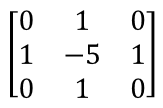

The pixel by pixel processing of image using the enhanced lapacian mask is as showon below:<br>
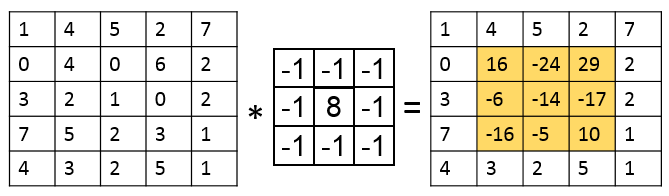

the above Laplacian mask provides the edges. However we want the sharpened image we have to use ENHANCED LAPLACIAN MASK AS SHOWN BELOW:

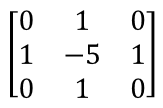

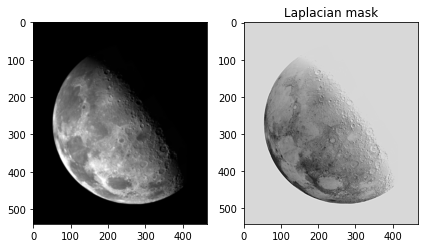

In [ ]:
# Read image 'Blurr_moon.tif'
# for -5

img = cv2.imread('Blurr_moon.tif',0)
I = img.copy()
mask =np.array([[0,1,0],[1,-5,1],[0,1,0]])
mask = mask/49
FI = signal.convolve2d(img,mask)

# plot the original and resultant image
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(FI,cmap='gray')
plt.title('Laplacian mask')
plt.tight_layout()

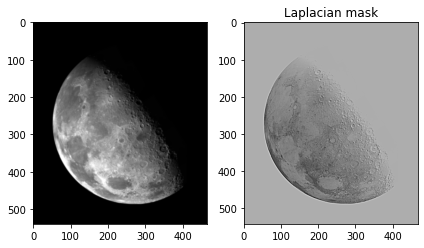

In [ ]:
# For -9 image

img = cv2.imread('Blurr_moon.tif',0)
I = img.copy()
mask =np.array([[1,1,1],[1,-9,1],[1,1,1]])
mask = mask/49
FI = signal.convolve2d(img,mask)

# create Laplacian mask


# plot the original and resultant image

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(FI,cmap='gray')
plt.title('Laplacian mask')
plt.tight_layout()

# Median Filtering for salt and pepper image <br>

It is used to eliminate salt and pepper noise. Here the pixel value is replaced by median value of the neighbouring pixel.

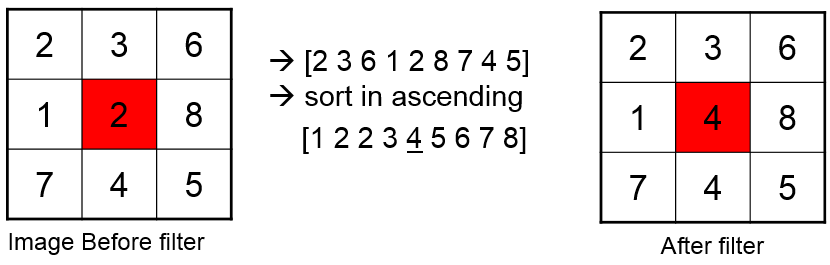

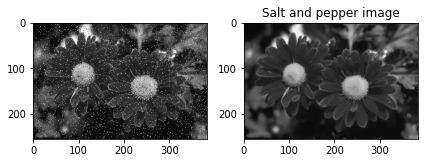

In [ ]:
# read the image
img = cv2.imread('Salt.png',0)
I = img.copy()
r,c = img.shape
for i in range(1,r-1):
  for j in range(1,c-1):
    temp = [img[i-1,j-1],img[i-1,j],img[i-1,j+1],img[i,j-1],img[i,j],img[i,j+1],img[i+1,j-1],img[i+1,j],img[i+1,j+1]]
    temp = sorted(temp)
    img[i,j]=temp[4]

# take the rows and columns of the image
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Salt and pepper image')
plt.tight_layout()





Built-In function

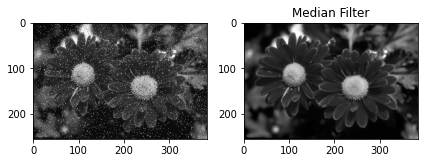

In [ ]:
from PIL import Image,ImageFilter
img = Image.open('Salt.png')
output = img.filter(ImageFilter.MedianFilter(size=3))
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(output,cmap='gray')
plt.title('Median Filter')
plt.tight_layout()

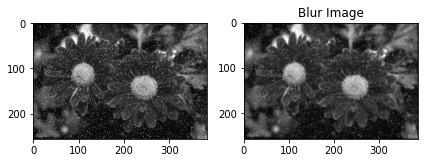

In [ ]:
from scipy import signal
img = cv2.imread('Salt.png',0)
I = img.copy()
mask =np.ones([3,3],dtype=int)
mask = mask/9
FI = signal.convolve2d(img,mask)

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(FI,cmap='gray')
plt.title('Blur Image')
plt.tight_layout()

# Conclusion :

We implemented the code for blurring the image using avg and weighted avg filter.
This filter is also used for remove noise from an img as it also blurs the image.
It was observed that the bluring effect is more as the filter mass size increases.
We implemented the code for edge detection for laplacian mass which can detect the edge because it is based on the difference bt fixed value.
A normal laplacian mass is ineffective to sharpen an image and can only detect edges.
Therefore we implemented a code to sharpen an image using enhanced laplacian mass.
We implemented a code for salt and pepper noise from a noisy image using median filter.
We also compared the results of salt and pepper noise removal using avg filter however a avg filter just blurs the salt and pepper noice and is ineffective as compared to median filter.